## 5.5.3 PCA综合实践
&emsp;&emsp;**例5-5-1** 使用PCA算法对鸢尾花数据集降至二维并可视化展示。

&emsp;&emsp;任选其中三个特征做可视化时，数据集在三维空间的分布如图5-5-5所示。可以看到无论选取哪三个特征都很难展现数据集的特点，也对分析数据造成了很大的困难。请使用sklearn库的PCA方法对鸢尾花数据集进行降维。
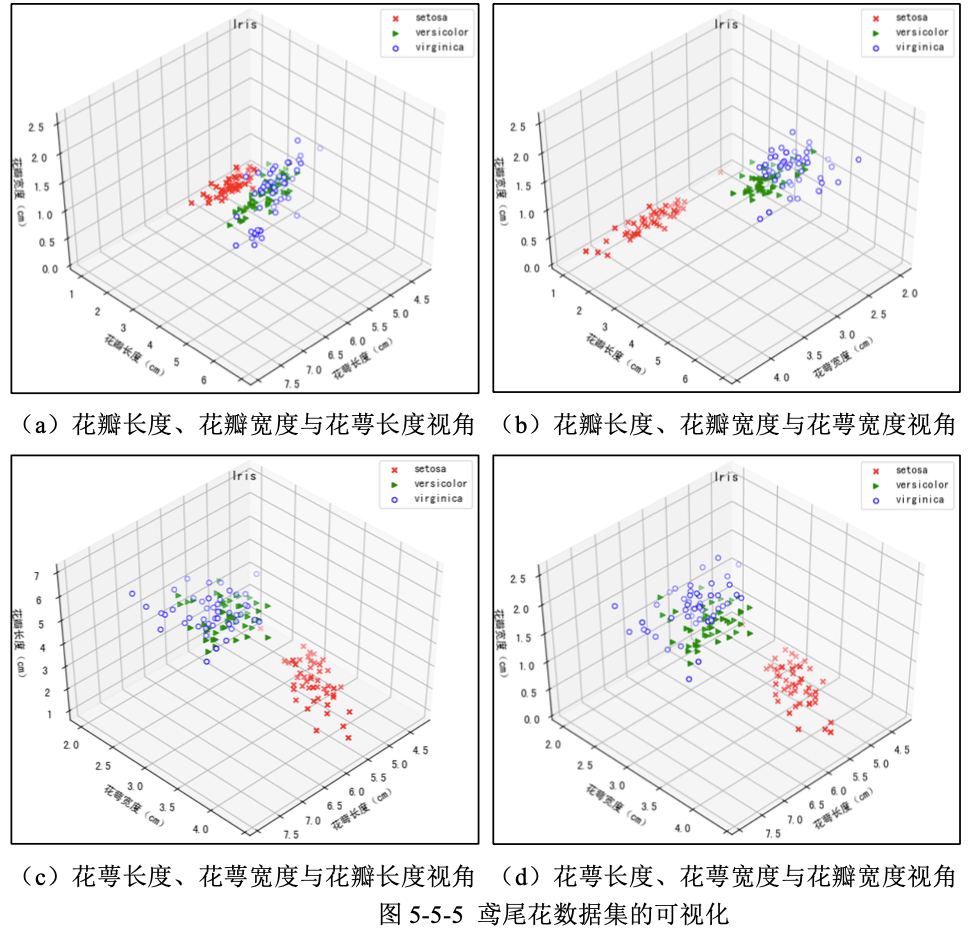

#### （1）导入库

&emsp;&emsp;matplotlib.pyplot，用于可视化图表

&emsp;&emsp;sklearn.datasets.load_iris，用于加载数据

&emsp;&emsp;sklearn.decomposition.PCA，用于降维

In [66]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
plt.rcParams['font.sans-serif'] = ['SimHei']  # 避免中文出现乱码
plt.rcParams['axes.unicode_minus'] = False

#### （2）导入数据集

&emsp;&emsp;使用加载器读取iris鸢尾花数据集，并存入数据集变量iris。

&emsp;&emsp;分别将鸢尾花数据集的特征值矩阵、分类数组存入变量X、y。

&emsp;&emsp;iris.data是鸢尾花数据集的特征值矩阵，iris.target是鸢尾花的分类数组，在这里用0、1、2分别代表'setosa'（山鸢尾）、'versicolor'（杂色鸢尾）、'virginica'（维吉尼亚鸢尾）这三个类别。
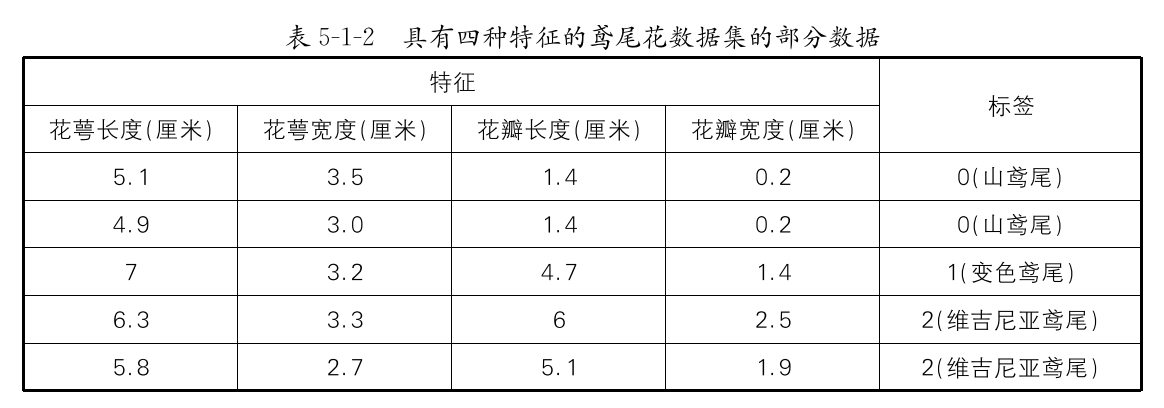

In [67]:
iris = load_iris()
X = iris.data
y = iris.target   #PCA属于无监督学习，训练无需分类标签，此处读取y仅为了便于后期显示


#### （3）降维

&emsp;&emsp;指定目标降维的维度n_components=2

&emsp;&emsp;使用fit_transform()得到降维后的数据X_p

&emsp;&emsp;X_p是一个具有两维特征的矩阵

In [68]:
pca = PCA(n_components=2)
X_p = pca.fit_transform(X)

#### （4）输出图像

&emsp;&emsp;语句`plt.scatter(X_p[y == i, 0], X_p[y == i, 1], c=colors[i], edgecolors=edge_colors[i], marker=marker[i], label=label[i])`用来绘制有不同形状和颜色绘点的散点图。

&emsp;&emsp;由于降维后的矩阵与降维前矩阵的数据一一对应，所以y仍然是X_p对应下标的分类属性。
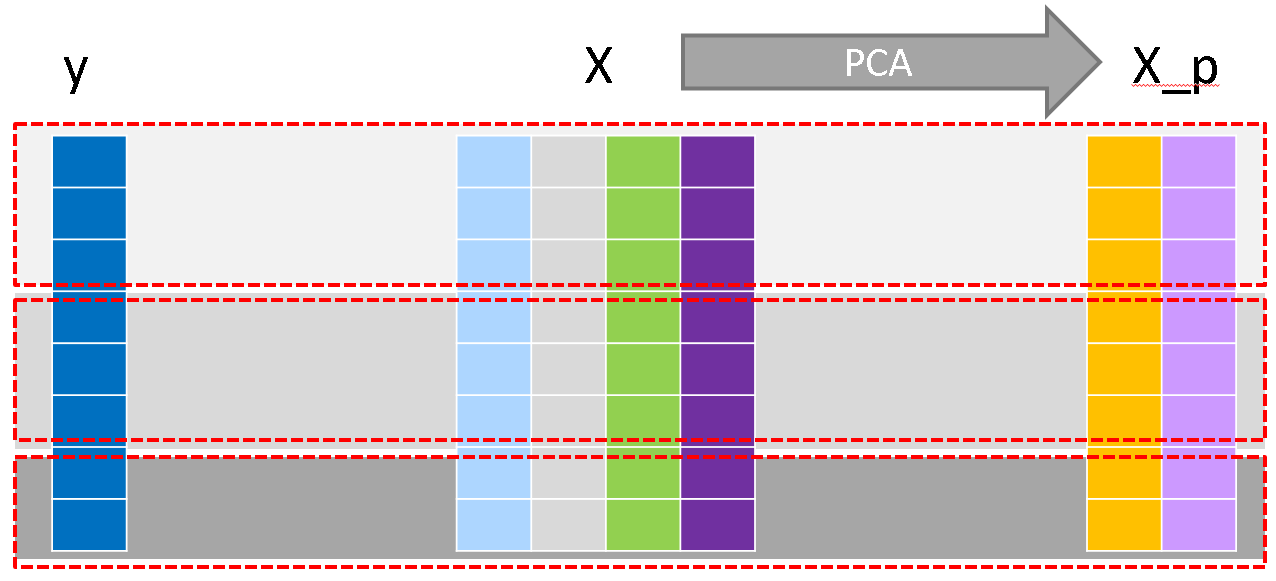

&emsp;&emsp;利用循环绘制每个类别的图像，`(X_p[y==i,0], X_p[y==i,1])`是类别为i的样本降维后的数据（即纵横轴坐标），color是绘点的填充颜色，edgecolors是绘点的轮廓颜色，marker是绘点的图案。

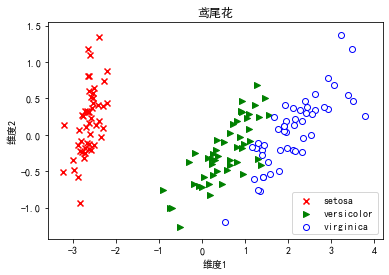

In [69]:
plt.figure()
colors = 'rgw'        #填充颜色
edge_colors = 'rgb'   #轮廓颜色
marker = 'x>o'        #图案
label = iris.target_names  #'setosa'（山鸢尾）、'versicolor'（杂色鸢尾）、'virginica'（维吉尼亚鸢尾）
for i in range(3):
    plt.scatter(X_p[y == i, 0], X_p[y == i, 1], c=colors[i], edgecolors=edge_colors[i], marker=marker[i], label=label[i])
plt.xlabel('维度1')
plt.ylabel('维度2')
plt.title('鸢尾花')
plt.legend()
plt.show()

#### 实验结论

横轴和纵轴分别是选取的二维空间，图中不同形状的点就是将原数据降至该平面的投影。
可以看到，通过降维，三类数据几乎完全分开，也就是说PCA取得了较好的效果。

&emsp;&emsp;**例5-5-2** 手写字数据集降维训练

&emsp;&emsp;本例对手写字数据集digits进行KNN分类训练，并观测降维前后对KNN训练的性能差异。

**主要步骤：**
1. 导入对应库
2. 导入digits数据集
3. 将数据集分割为25%测试数据和75%训练数据，并将训练数据扩展128（2^7）倍，这一步是为了得到更大的数据集使得训练时间差更明显
4. 对训练数据集进行KNN分类训练并对测试数据进行预测，计算训练时间并展示预测效果
5. 将原始数据使用PCA方法降维
6. 重复上述步骤3～4，对降维后的数据集进行分割、扩展训练数据并进行KNN分类训练和预测


&emsp;&emsp;以下是代码实现及分段解释：

#### （1）导入库

&emsp;&emsp;sklearn.datasets，用于导入数据加载器

&emsp;&emsp;sklearn.decomposition.PCA，用于降维

&emsp;&emsp;sklearn.neighbors.KNeighborsClassifier，用于KNN分类

&emsp;&emsp;sklearn.metrics.classification_report，用于分析预测结果

&emsp;&emsp;sklearn.model_selection.train_test_split，用于分割数据

In [70]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import time

#### （2）导入数据集

&emsp;&emsp;使用加载器读取数据并存入变量digits

&emsp;&emsp;将手写字数据集的特征数据存入变量X，分类数据存入变量y

In [71]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [72]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


#### （3）分割数据并扩展训练数据

&emsp;&emsp;将数据集分割为25%测试数据和75%训练数据

&emsp;&emsp;将训练数据扩展至原来的128倍

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape)
print(y_train.shape)

for i in np.arange(7):
    X_train = np.vstack((X_train, X_train))
    y_train = np.hstack((y_train, y_train))
print(X_train.shape)
print(y_train.shape)

(1347, 64)
(1347,)
(172416, 64)
(172416,)


#### （4）计算降维前使用KNN算法训练耗时

&emsp;&emsp;语句`ticks = time.time()`用于获取当前时间的时间戳并赋值给变量ticks，然后利用KNN进行分类训练，训练完成后计算训练耗时。

In [75]:
knc = KNeighborsClassifier()
ticks = time.time()
knc.fit(X_train, y_train)
print('降维前耗时:', time.time() - ticks, 's')

降维前耗时: 23.058645009994507 s


#### 预测并展示性能

&emsp;&emsp;语句`y_predict = knc.predict(X_test)`用于对测试集进行预测并将预测结果存储在y_predict中。

&emsp;&emsp;语句`classification_report(y_test, y_predict)`比较测试集标签和预测结果，计算并展示了各个分类预测的精确度、召回率等。

In [76]:
y_predict = knc.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.97        54
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        35
           5       1.00      0.98      0.99        48
           6       0.98      1.00      0.99        51
           7       1.00      1.00      1.00        35
           8       0.98      0.95      0.96        58
           9       0.98      0.95      0.97        44

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### （5）降维

&emsp;&emsp;指定目标降维的维度n_components=10，然后再使用fit_transform()得到降维后的数据X_p。

In [77]:
pca = PCA(n_components=10)
X_p = pca.fit_transform(X)

#### （6）分割降维后的数据并扩展训练数据

&emsp;&emsp;将降维后的数据集分割为25%测试数据和75%训练数据

&emsp;&emsp;将训练数据扩展至原来的128倍

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.25, random_state=33)
for i in np.arange(7):
    X_train = np.vstack((X_train, X_train))
    y_train = np.hstack((y_train, y_train))
print(X_train.shape)

(172416, 10)


#### （7）计算降维后使用KNN算法训练耗时

&emsp;&emsp;同（4）步骤，展示降维后使用KNN算法训练耗时

In [79]:
ticks = time.time()
knc.fit(X_train, y_train)
print('降维后耗时:', time.time() - ticks, 's')

降维后耗时: 1.421003818511963 s


#### 预测并展示性能

In [80]:
y_predict = knc.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       1.00      0.94      0.97        35
           5       0.98      0.94      0.96        48
           6       0.98      1.00      0.99        51
           7       1.00      1.00      1.00        35
           8       0.98      0.97      0.97        58
           9       0.87      0.93      0.90        44

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



#### 实验结论

在降维前后，KNN算法的accuracy相差不大，由0.99变为0.98。

在降维前后，KNN算法的训练耗时大大减少，从4.06s降至0.25s。

通过降维可以有效降低KNN分类算法的时间开销。
